In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd  /content/drive/'My Drive'/'NYU/3rd sem/PA/Project/data'/


Mounted at /content/drive
/content/drive/My Drive/NYU/3rd sem/PA/Project/data


In [2]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

files = []

for dirname, _, filenames in os.walk(os.getcwd()):
  for filecurr in filenames:
    temp = pd.read_csv(os.path.join(dirname, filecurr))
    files.append(temp)

df = pd.concat(files, axis=0, ignore_index=True)

print(f"Shape of the dataset -> {df.shape}")
df.head()

Shape of the dataset -> (968, 18)


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.957,92.998,4,235760


In [3]:
df.info()

colors = ["#09101F","#72DDF7", '#F7AEF8']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        968 non-null    object 
 1   artist_name       968 non-null    object 
 2   artist_pop        968 non-null    int64  
 3   album             968 non-null    object 
 4   track_pop         968 non-null    int64  
 5   danceability      968 non-null    float64
 6   energy            968 non-null    float64
 7   loudness          968 non-null    float64
 8   mode              968 non-null    int64  
 9   key               968 non-null    int64  
 10  speechiness       968 non-null    float64
 11  acousticness      968 non-null    float64
 12  instrumentalness  968 non-null    float64
 13  liveness          968 non-null    float64
 14  valence           968 non-null    float64
 15  tempo             968 non-null    float64
 16  time_signature    968 non-null    int64  
 1

In [16]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3, color='black')

def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    
    sns.histplot(data=df, x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=3
                )
    ax.lines[0].set_color(second_color)
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel("")

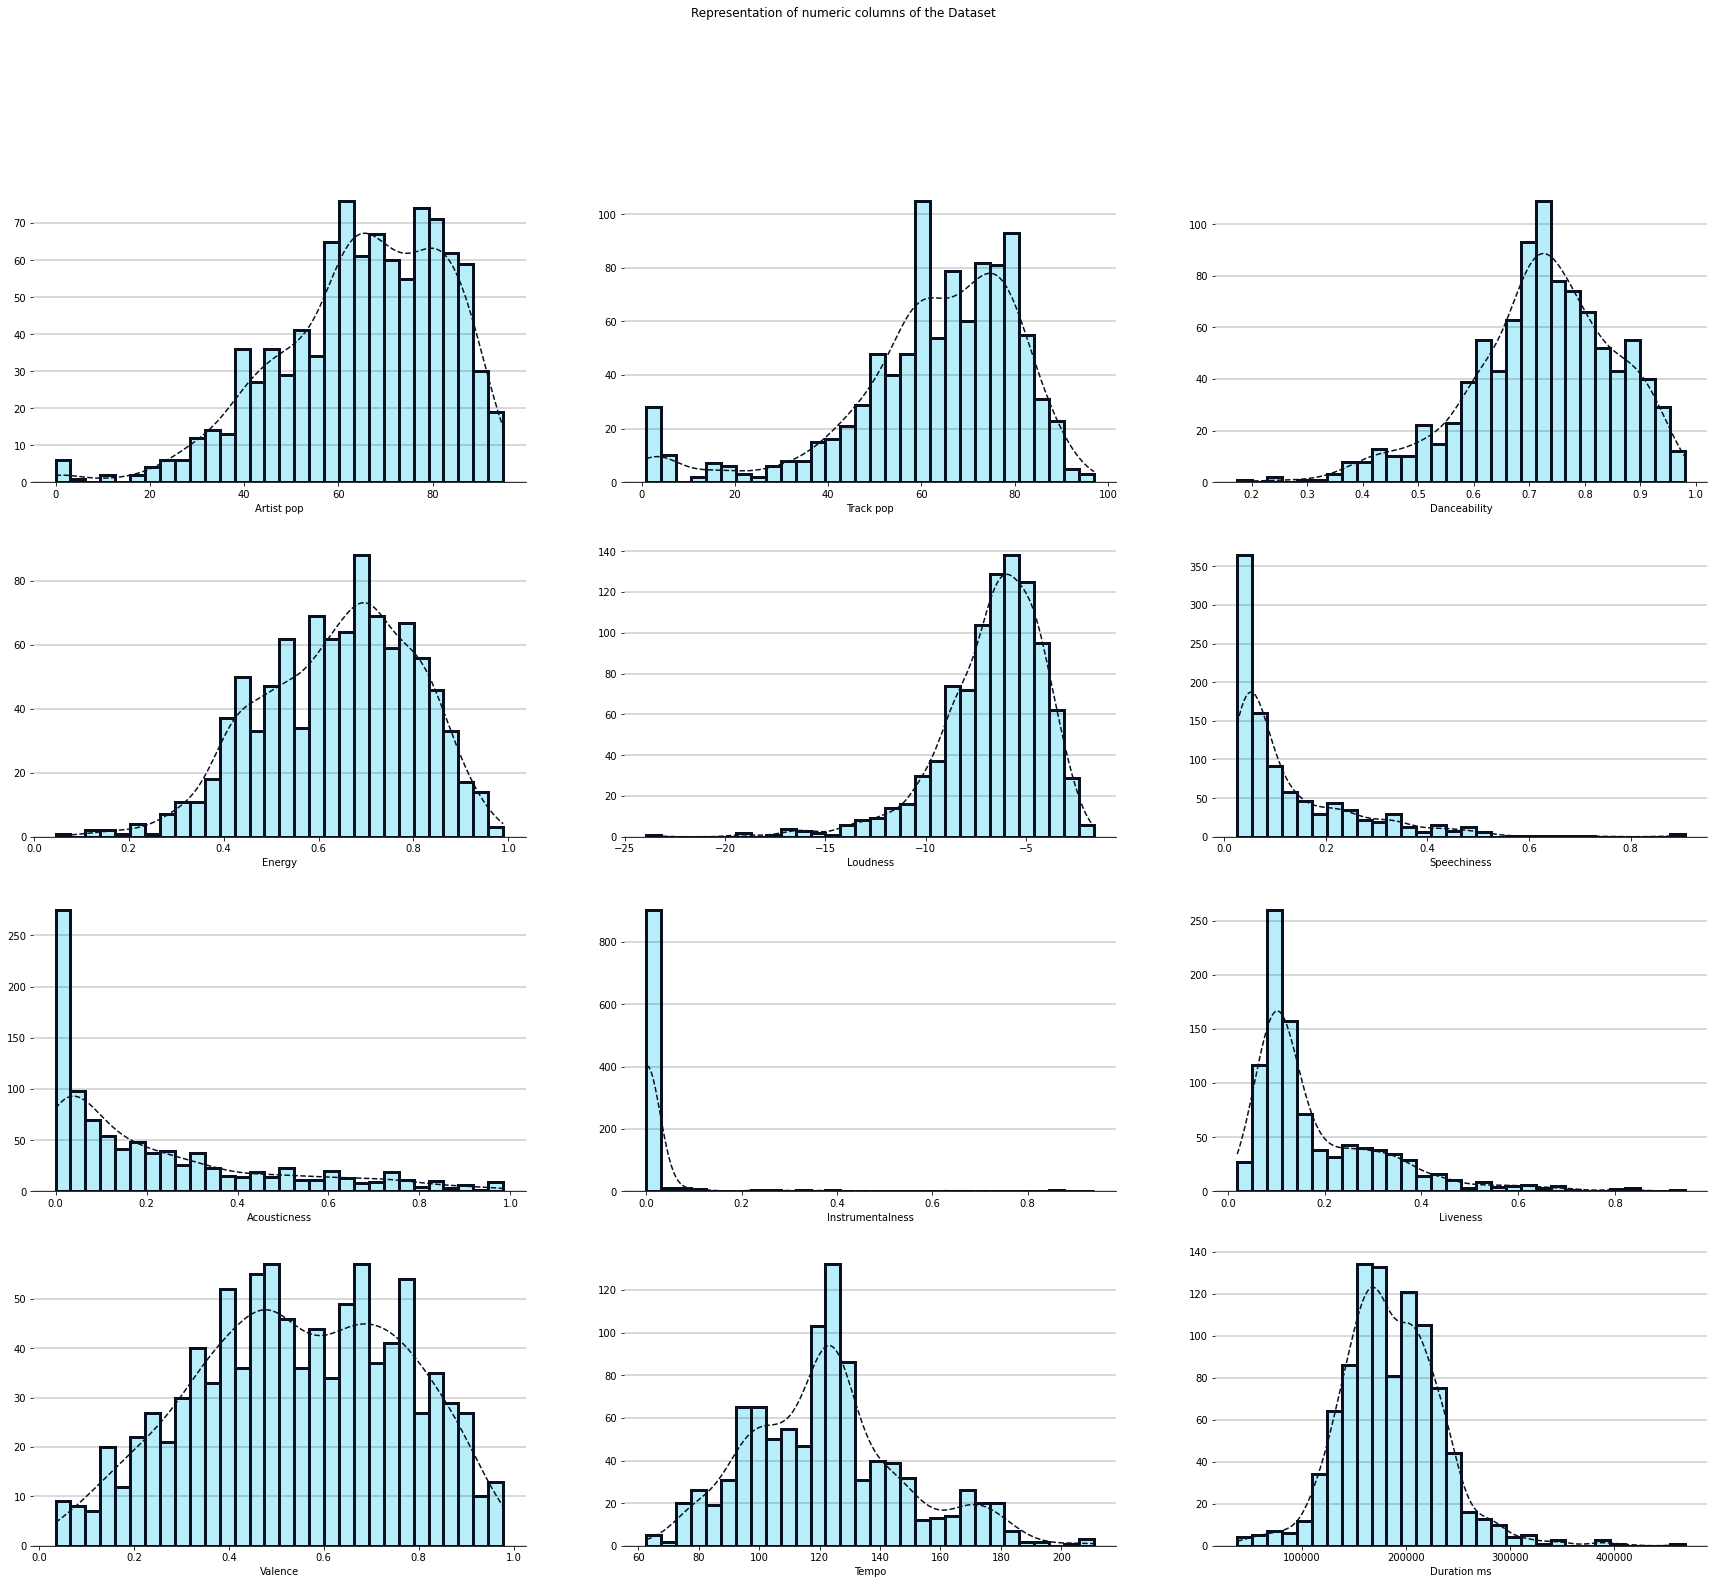

In [17]:
cols = ['artist_pop',	'track_pop',	'danceability', 
        'energy',	'loudness', 'speechiness',	'acousticness',	'instrumentalness',	
        'liveness',	'valence',	'tempo',	'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Representation of numeric columns of the Dataset")
    
plt.show()

In [6]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    
    ax.bar(df[x].value_counts().index, df[x].value_counts().values,
           color=main_color, edgecolor=second_color, linewidth=3)
    
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel("")

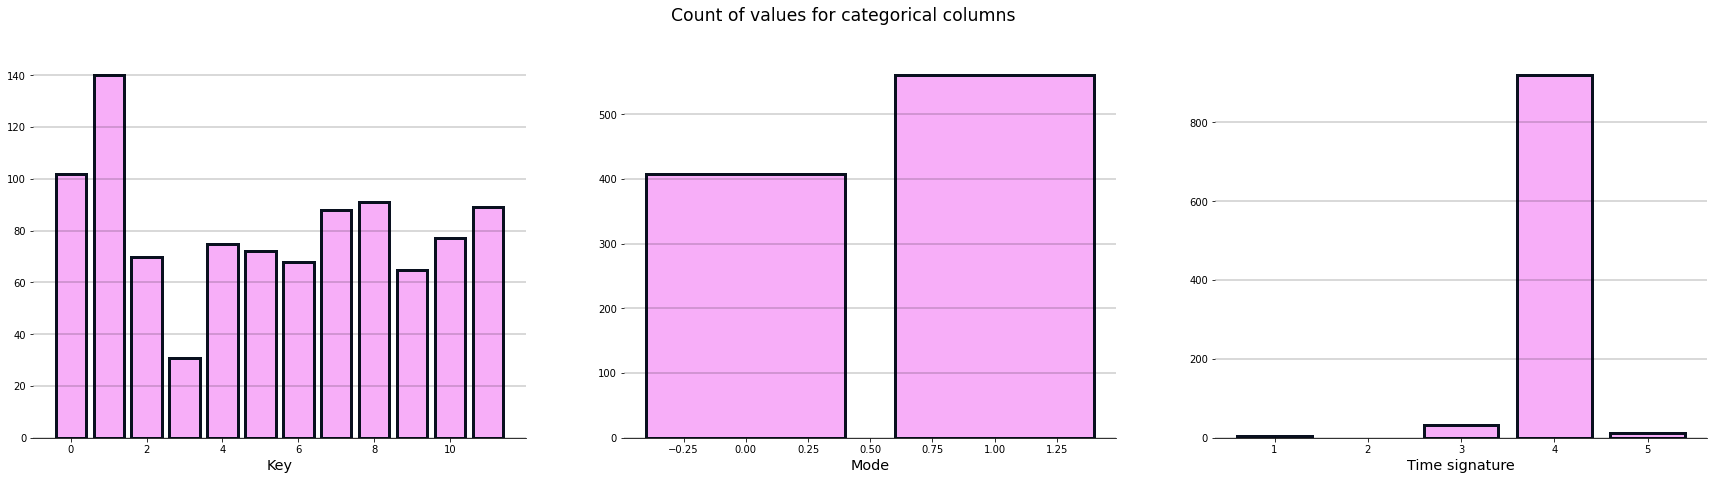

In [7]:
cols = ['key', 'mode', 'time_signature']


fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns")

plt.show()

In [8]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean() 

def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

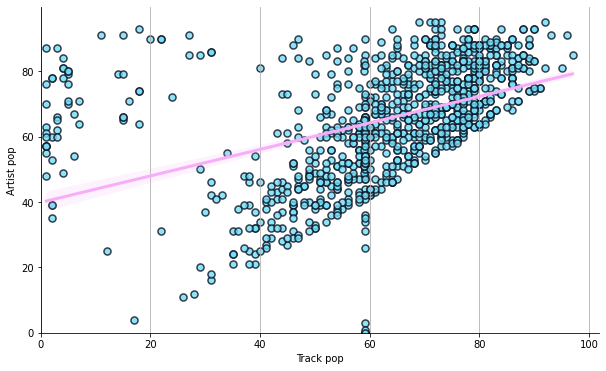

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

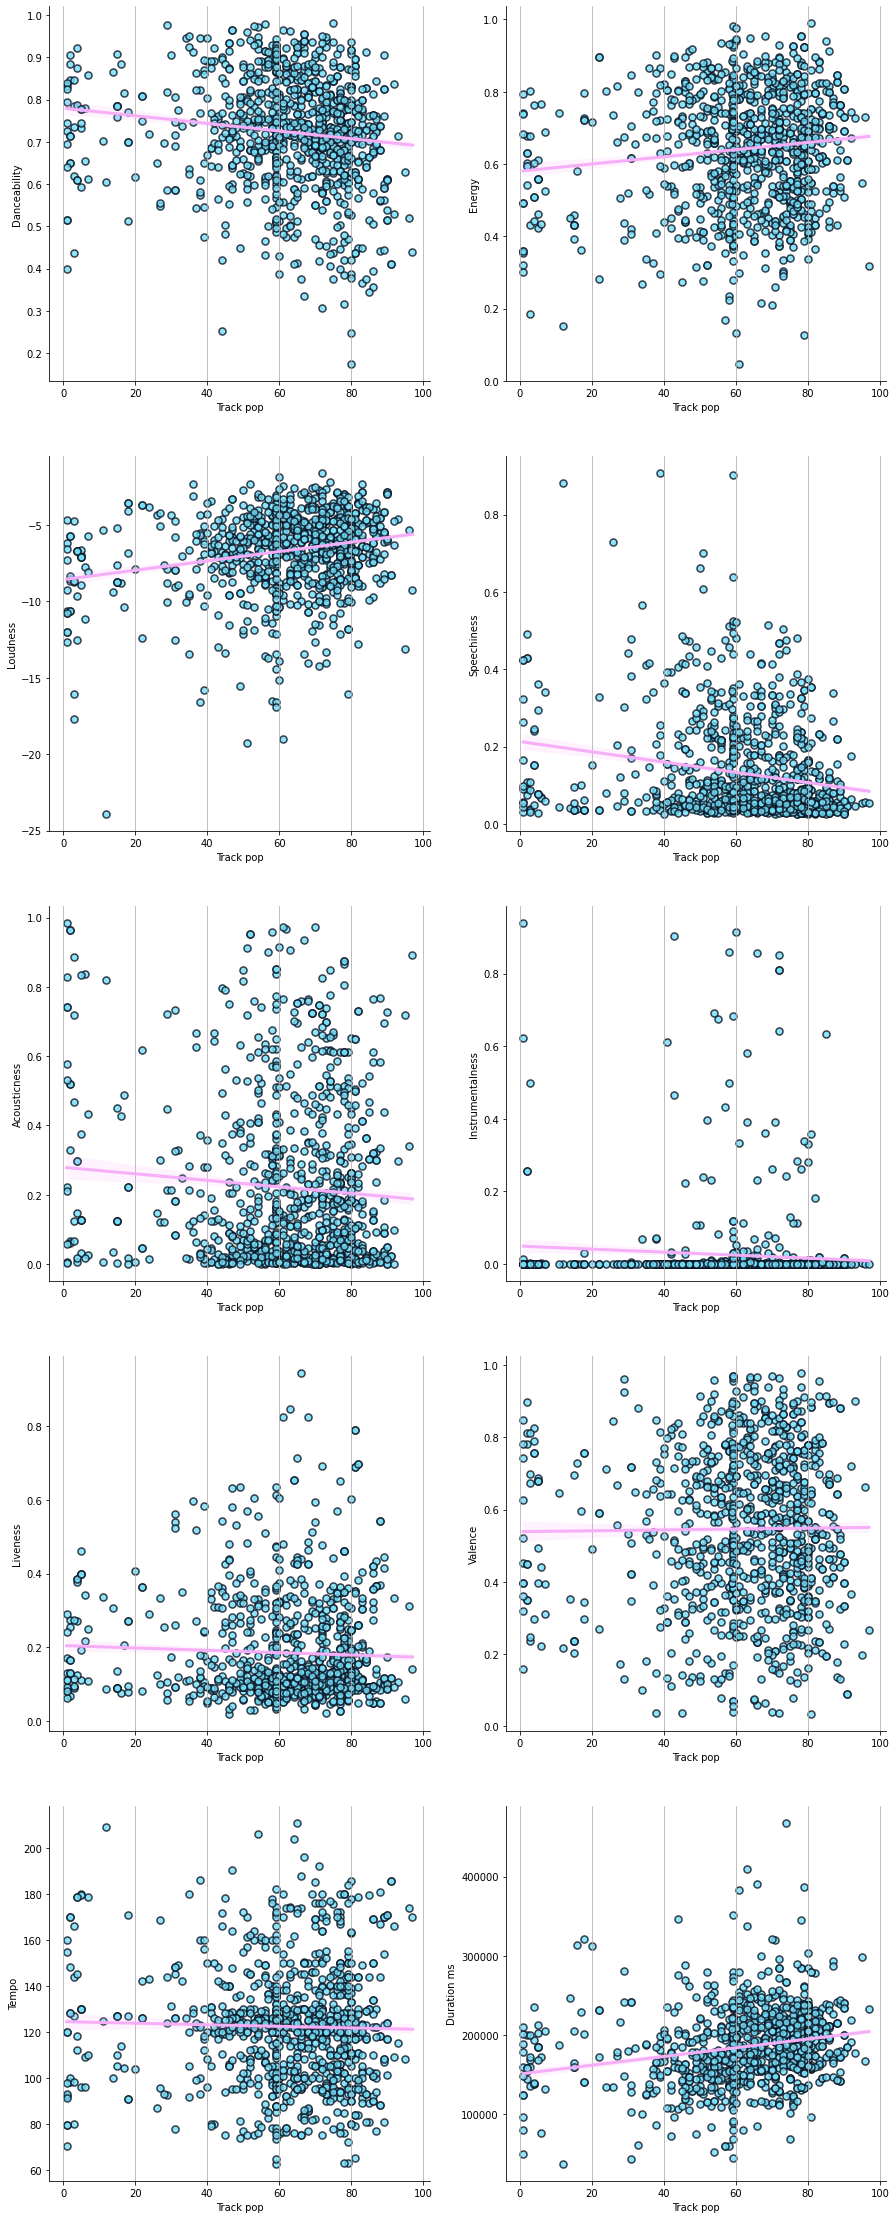

In [10]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'track_pop', col, ax)
    

plt.show()
    

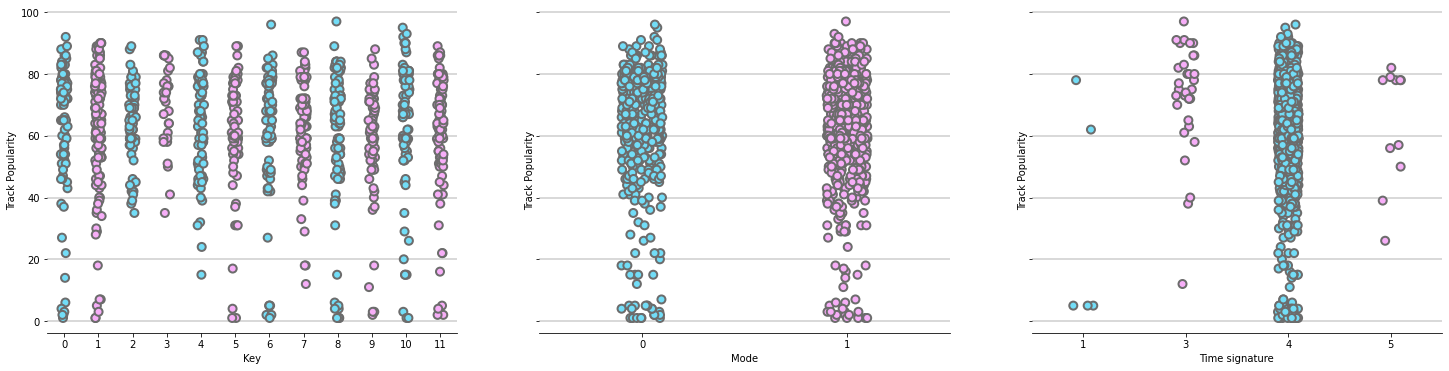

In [11]:
def stripplot(df, x, y, ax, palette=[colors[1], colors[2]]):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
                 linewidth=2, size=8)
    
    set_style(ax)

fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

for i, col in enumerate(['key', 'mode', 'time_signature']):
    
    stripplot(df, col, 'track_pop', axs[i])
    
    axs[i].set(
        xlabel=col.replace("_", " ").capitalize(),
        ylabel="Track Popularity"
    )

plt.show()

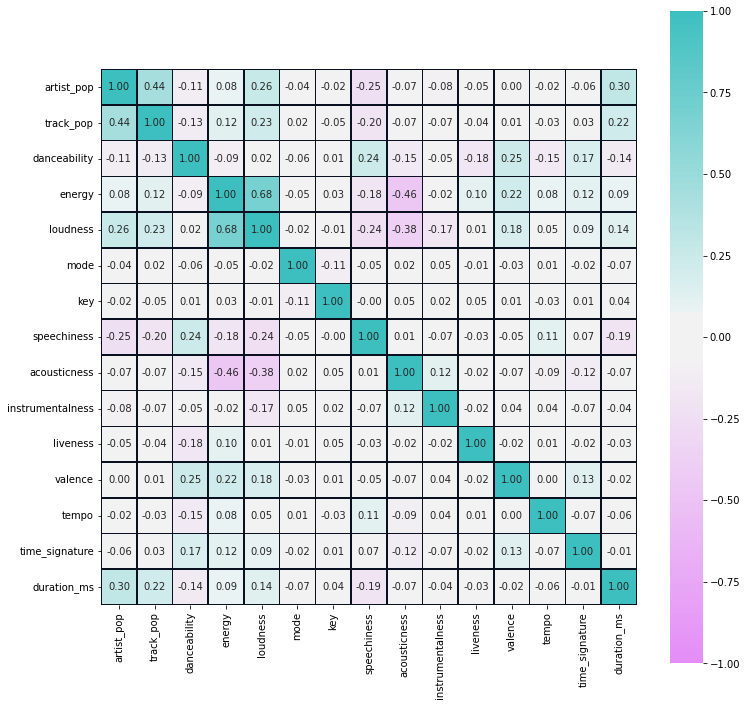

In [12]:
def corr_map(df, ax, palette, edgecolor=colors[0]):
    
    corr = df.corr()
    
    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")
    

fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df, ax, palette)

In [13]:
artists_pop_sorted = df.loc[:, ['artist_name', 'artist_pop']].drop_duplicates('artist_name').sort_values('artist_pop', ascending=False)

artists_pop_sorted[:3]

,artist_name,artist_pop
382,Drake,95
129,Taylor Swift,93
224,The Weeknd,93


In [14]:
artists_top_hits = df['artist_name'].value_counts(ascending=False)

artists_top_hits[:3]

Doja Cat         25
Justin Bieber    11
Lil Nas X        10
Name: artist_name, dtype: int64

In [15]:
tracks_pop_sorted = df.loc[:, ['track_name', 'track_pop']].sort_values('track_pop', ascending=False)

tracks_pop_sorted[:5]

,track_name,track_pop
710,Glimpse of Us,97.0
706,As It Was,96.0
705,Running Up That Hill (A Deal With God),95.0
757,Late Night Talking,93.0
709,About Damn Time,92.0
